In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split training data into training (60%) and validation (20%)
x_train, x_val = x_train_full[:30000], x_train_full[30000:]
y_train, y_val = y_train_full[:30000], y_train_full[30000:]

# One-hot encode labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transforms including data augmentation
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Split train dataset into training and validation
train_size = int(0.6 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 170M/170M [00:02<00:00, 66.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 107ms/step - accuracy: 0.3168 - loss: 1.8542 - val_accuracy: 0.4968 - val_loss: 1.4103
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 95ms/step - accuracy: 0.5311 - loss: 1.3122 - val_accuracy: 0.5557 - val_loss: 1.2596
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 95ms/step - accuracy: 0.5896 - loss: 1.1606 - val_accuracy: 0.5820 - val_loss: 1.1960
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.6361 - loss: 1.0358 - val_accuracy: 0.6172 - val_loss: 1.1011
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 95ms/step - accuracy: 0.6584 - loss: 0.9734 - val_accuracy: 0.6528 - val_loss: 1.0161
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.6921 - loss: 0.8828 - val_accuracy: 0.6348 - val_loss: 1.0690
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.7103 - loss: 0.8352 - val_accuracy: 0.6557 - val_loss: 1.0030
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.7314 - loss: 0.7777 -

without regularization

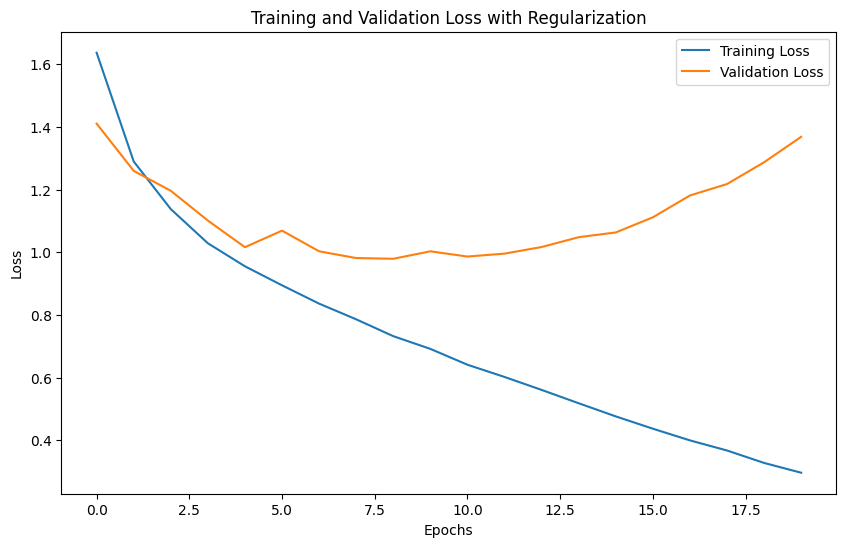

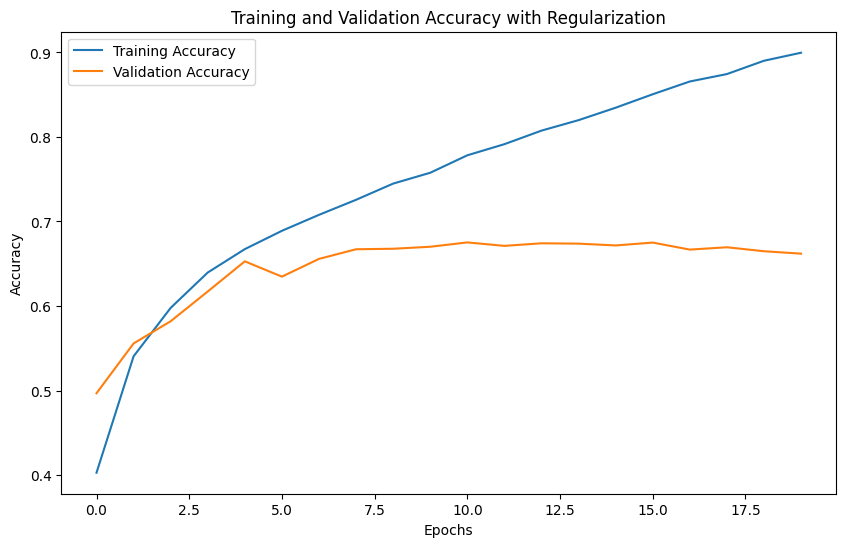

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Regularization')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Regularization')
plt.show()


Step 4: Implement Regularization


In [ ]:


# Define CNN model with L2 Regularization and Dropout
def build_model():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001),
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))

    # Dropout Layer
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model



In [ ]:
# Compile the model
model = build_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_val, y_val))



Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 100ms/step - accuracy: 0.2612 - loss: 2.1188 - val_accuracy: 0.4669 - val_loss: 1.6078
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.4343 - loss: 1.6488 - val_accuracy: 0.5273 - val_loss: 1.4520
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.4887 - loss: 1.5423 - val_accuracy: 0.5511 - val_loss: 1.4020
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.5175 - loss: 1.4774 - val_accuracy: 0.5402 - val_loss: 1.4093
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 98ms/step - accuracy: 0.5335 - loss: 1.4364 - val_accuracy: 0.5860 - val_loss: 1.3361
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - accuracy: 0.5582 - loss: 1.3836 - val_accuracy: 0.5940 - val_loss: 1.3086
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.5701 - loss: 1.3727 - val_accuracy: 0.6128 - val_loss: 1.2776
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.5885 - loss: 1.330

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6765 - loss: 1.1458
Test Loss: 1.1531802415847778, Test Accuracy: 0.67330002784729


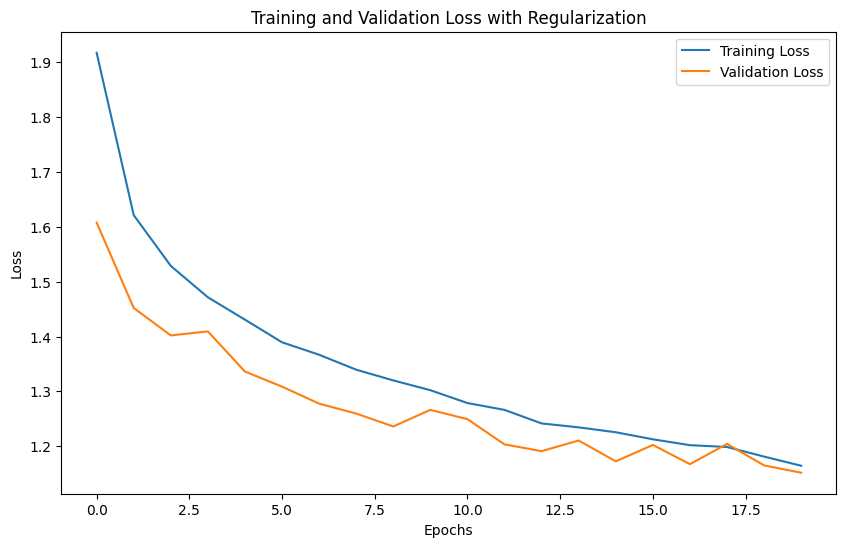

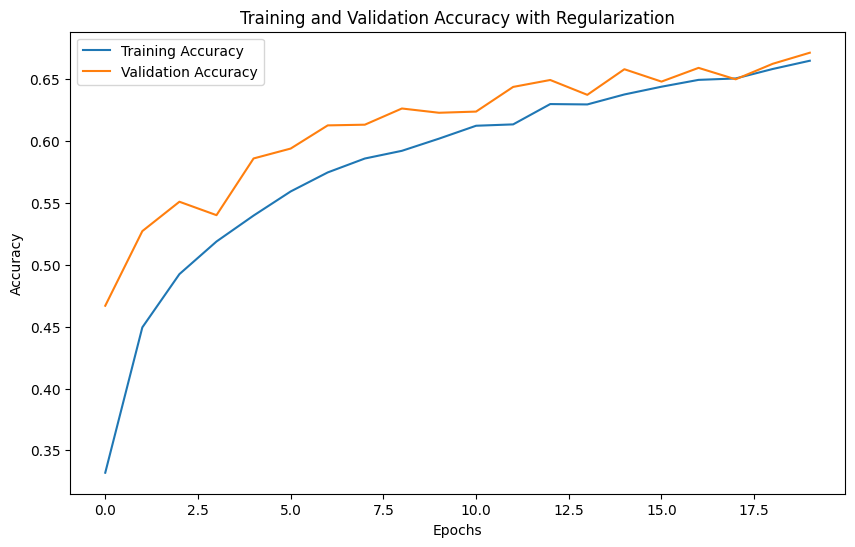

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss with Regularization')
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Regularization')
plt.show()


2.	Weight Initialization:
o	Experiment with different weight initialization methods:
	Default initialization
	Xavier (Glorot) Initialization
	He Initialization



Training model with Default initialization...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - accuracy: 0.3372 - loss: 1.8161 - val_accuracy: 0.5247 - val_loss: 1.3374
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 96ms/step - accuracy: 0.5492 - loss: 1.2619 - val_accuracy: 0.5780 - val_loss: 1.2028
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 105ms/step - accuracy: 0.6154 - loss: 1.0975 - val_accuracy: 0.5977 - val_loss: 1.1627
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 99ms/step - accuracy: 0.6524 - loss: 0.9963 - val_accuracy: 0.6355 - val_loss: 1.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.6845 - loss: 0.9086 - val_accuracy: 0.6508 - val_loss: 1.0149
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6469 - loss: 1.0053


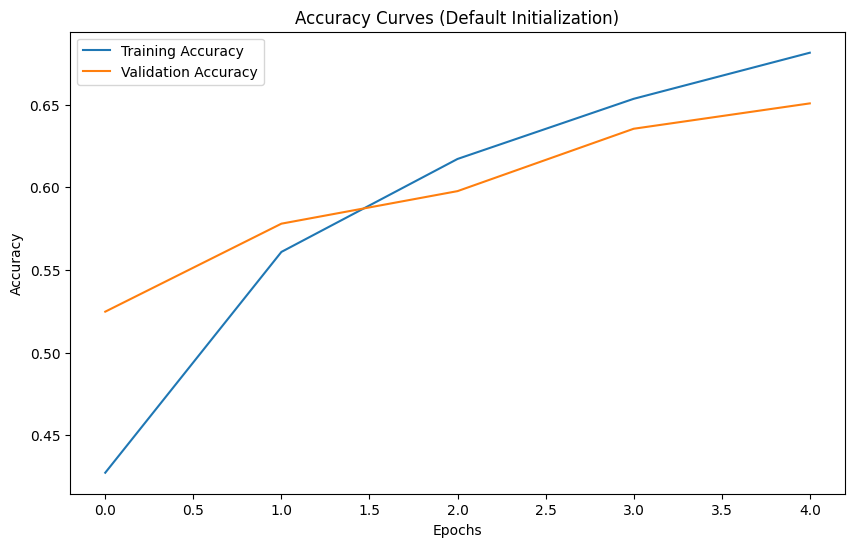


Training model with Xavier initialization...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 100ms/step - accuracy: 0.3326 - loss: 1.8258 - val_accuracy: 0.5082 - val_loss: 1.3674
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.5467 - loss: 1.2674 - val_accuracy: 0.5790 - val_loss: 1.2090
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 96ms/step - accuracy: 0.6173 - loss: 1.0929 - val_accuracy: 0.6102 - val_loss: 1.1403
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - accuracy: 0.6543 - loss: 0.9896 - val_accuracy: 0.6283 - val_loss: 1.0789
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.6838 - loss: 0.9078 - val_accuracy: 0.6531 - val_loss: 1.0082
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6601 - loss: 0.9852


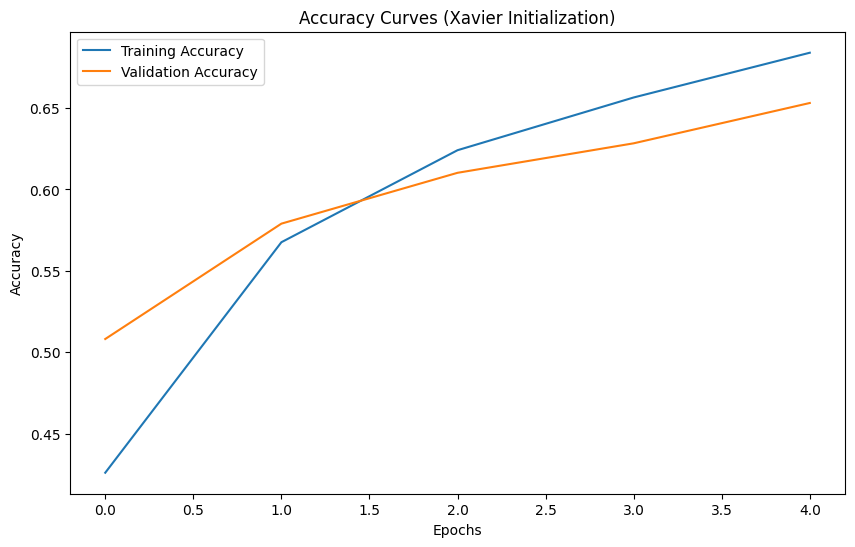


Training model with He initialization...
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 104ms/step - accuracy: 0.3448 - loss: 1.8173 - val_accuracy: 0.5220 - val_loss: 1.3641
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 97ms/step - accuracy: 0.5615 - loss: 1.2444 - val_accuracy: 0.5816 - val_loss: 1.1965
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 101ms/step - accuracy: 0.6268 - loss: 1.0748 - val_accuracy: 0.6189 - val_loss: 1.1007
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.6667 - loss: 0.9640 - val_accuracy: 0.6256 - val_loss: 1.0776
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.7011 - loss: 0.8653 - val_accuracy: 0.6272 - val_loss: 1.1057
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6356 - loss: 1.0861


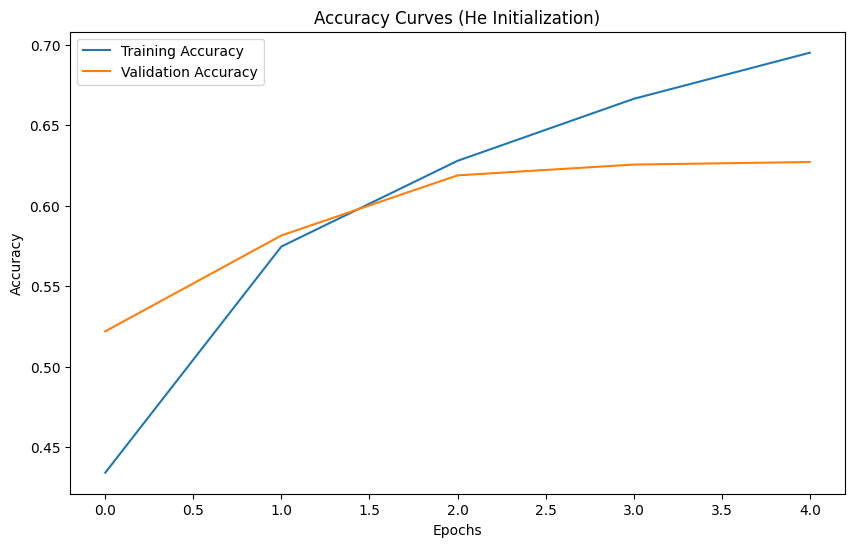


Default Initialization -> Test Loss: 1.0089, Test Accuracy: 0.6484

Xavier Initialization -> Test Loss: 0.9932, Test Accuracy: 0.6525

He Initialization -> Test Loss: 1.0925, Test Accuracy: 0.6324


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split dataset into training, validation, and test sets
x_train, x_val = x_train[:30000], x_train[30000:]
y_train, y_val = y_train[:30000], y_train[30000:]

# Build the CNN Model with Variable Weight Initialization
def build_model(initializer):
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            kernel_initializer=initializer,
                            input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu',
                            kernel_initializer=initializer))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(128, activation='relu',
                           kernel_initializer=initializer))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Experiment with different initializers
initializers = {
    'Default': 'glorot_uniform',  # Default initializer in Keras
    'Xavier': tf.keras.initializers.GlorotUniform(),
    'He': tf.keras.initializers.HeNormal()
}

results = {}

for name, initializer in initializers.items():
    print(f"\nTraining model with {name} initialization...")
    model = build_model(initializer)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                        validation_data=(x_val, y_val), verbose=1)
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    results[name] = {'loss': test_loss, 'accuracy': test_accuracy}

    # Plot training and validation accuracy for each initializer
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curves ({name} Initialization)')
    plt.legend()
    plt.show()

# Compare results
for name, metrics in results.items():
    print(f"\n{name} Initialization -> Test Loss: {metrics['loss']:.4f}, Test Accuracy: {metrics['accuracy']:.4f}")


Grid Search Implementation

In [ ]:
from sklearn.model_selection import ParameterGrid
import tensorflow as tf

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd']
}

# Create a grid of parameters
grid = list(ParameterGrid(param_grid))

# Record results
results = []

# Loop through each parameter combination
for params in grid:
    print(f"Training with params: {params}")

    # Build model
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile model
    optimizer = params['optimizer']
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train model
    history = model.fit(
        x_train, y_train,
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        validation_data=(x_val, y_val),
        verbose=0
    )

    # Evaluate on validation set
    val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
    results.append({'params': params, 'val_accuracy': val_accuracy})

# Find the best hyperparameter combination
best_result = max(results, key=lambda x: x['val_accuracy'])
print(f"\nBest Params: {best_result['params']}, Validation Accuracy: {best_result['val_accuracy']:.4f}")


Training with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'sgd'}
Training with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'adam'}
Training with params: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'sgd'}
Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}
Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'sgd'}


 Random Search Implementation

In [2]:
import random

# Define hyperparameter space
param_space = {
    'learning_rate': [0.001, 0.01, 0.1, 0.0001],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop']
}

# Randomly sample combinations
n_samples = 5  # Number of random combinations to test
random_combinations = [
    {k: random.choice(v) for k, v in param_space.items()} for _ in range(n_samples)
]

results = []

for params in random_combinations:
    print(f"Training with params: {params}")

    # Model creation, compilation, and training steps remain the same as Grid Search.
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    optimizer = params['optimizer']
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=params['learning_rate'])
    elif optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=params['learning_rate'])
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        validation_data=(x_val, y_val),
        verbose=0
    )

    val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
    results.append({'params': params, 'val_accuracy': val_accuracy})

# Find best hyperparameter combination
best_result = max(results, key=lambda x: x['val_accuracy'])
print(f"\nBest Params: {best_result['params']}, Validation Accuracy: {best_result['val_accuracy']:.4f}")


Training with params: {'learning_rate': 0.01, 'batch_size': 64, 'epochs': 30, 'optimizer': 'adam'}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with params: {'learning_rate': 0.001, 'batch_size': 128, 'epochs': 20, 'optimizer': 'rmsprop'}
Training with params: {'learning_rate': 0.0001, 'batch_size': 128, 'epochs': 20, 'optimizer': 'adam'}
Training with params: {'learning_rate': 0.001, 'batch_size': 64, 'epochs': 30, 'optimizer': 'sgd'}
Training with params: {'learning_rate': 0.01, 'batch_size': 32, 'epochs': 10, 'optimizer': 'sgd'}

Best Params: {'learning_rate': 0.001, 'batch_size': 128, 'epochs': 20, 'optimizer': 'rmsprop'}, Validation Accuracy: 0.6619


1. Observe Gradient Norms and Gradient
Clipping


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:617: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(


938/938 ━━━━━━━━━━━━━━━━━━━━ 137s 141ms/step - accuracy: 0.3709 - loss: 1.7299 - val_accuracy: 0.4926 - val_loss: 1.3959
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 124s 132ms/step - accuracy: 0.5794 - loss: 1.1774 - val_accuracy: 0.6053 - val_loss: 1.1303
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 140s 130ms/step - accuracy: 0.6469 - loss: 1.0121 - val_accuracy: 0.6345 - val_loss: 1.0451
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 147s 136ms/step - accuracy: 0.6826 - loss: 0.9048 - val_accuracy: 0.6492 - val_loss: 1.0210
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 136s 130ms/step - accuracy: 0.7251 - loss: 0.7895 - val_accuracy: 0.6683 - val_loss: 0.9717


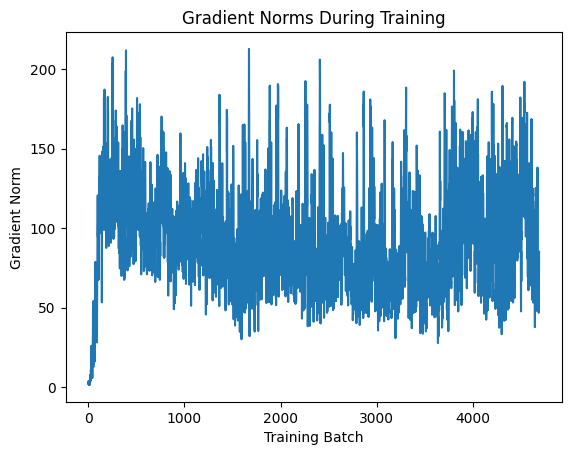

Test Loss: 0.9714, Test Accuracy: 0.6649
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


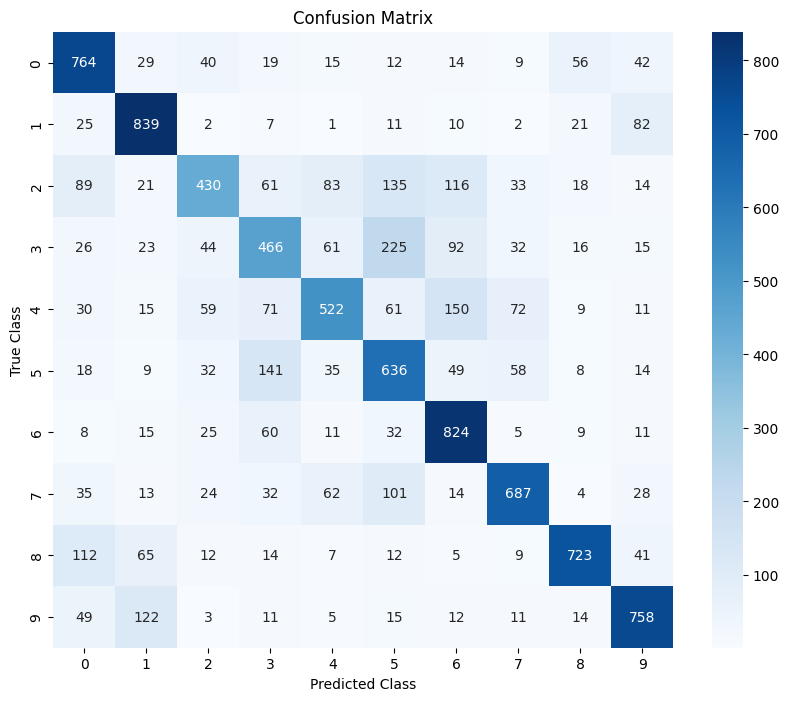

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.76      0.71      1000
           1       0.73      0.84      0.78      1000
           2       0.64      0.43      0.51      1000
           3       0.53      0.47      0.50      1000
           4       0.65      0.52      0.58      1000
           5       0.51      0.64      0.57      1000
           6       0.64      0.82      0.72      1000
           7       0.75      0.69      0.72      1000
           8       0.82      0.72      0.77      1000
           9       0.75      0.76      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split training data into training (60%) and validation (20%)
x_train, x_val = x_train_full[:30000], x_train_full[30000:]
y_train, y_val = y_train_full[:30000], y_train_full[30000:]

# One-hot encode labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Build the model (necessary for gradient monitoring)
model.build(input_shape=(None, 32, 32, 3))

# Gradient Monitoring Callback
class GradientMonitor(tf.keras.callbacks.Callback):
    def __init__(self):
        self.gradient_norms = []

    def on_train_batch_end(self, batch, logs=None):
        with tf.GradientTape() as tape:
            # Forward pass using dummy data to avoid undefined input error
            dummy_input = tf.random.uniform((32, 32, 32, 3))  # Batch size of 32
            logits = self.model(dummy_input, training=True)
            dummy_target = tf.one_hot(tf.random.uniform((32,), maxval=10, dtype=tf.int32), 10)
            loss = self.model.compiled_loss(dummy_target, logits, regularization_losses=self.model.losses)

        # Compute gradients
        gradients = tape.gradient(loss, self.model.trainable_variables)
        # Calculate norm for each layer
        norms = [tf.norm(g).numpy() if g is not None else 0 for g in gradients]
        self.gradient_norms.append(sum(norms))

# Apply Gradient Clipping
optimizer = tf.keras.optimizers.Adam(clipnorm=1.0)  # Clip gradients by norm
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Gradient monitor instance
gradient_monitor = GradientMonitor()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[gradient_monitor]
)

# Plot gradient norms
plt.plot(gradient_monitor.gradient_norms)
plt.title("Gradient Norms During Training")
plt.xlabel("Training Batch")
plt.ylabel("Gradient Norm")
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate Confusion Matrix and Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n", class_report)
